# Imports

In [9]:
import scripts.algs as algs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Functions

In [2]:
sizes= [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
def gen_vectors(size, number):
    vecList = []
    for i in range(number):
        vecList.append(np.random.rand(size))
    return vecList   
def run_alg(vec, alg):
    if alg == 'bubble':
        conds, assigns = algs.bubblesort(vec)[1:]
    if alg == 'quick':
        conds, assigns = algs.quicksort(vec)[1:]
    if alg == 'insertion':
        conds, assigns = algs.insertionsort(vec)[1:]
        
    return conds, assigns    
def test_alg(sizes, number, alg):
    results=[]
    for i in sizes:
        conds = []
        assigns = []
        vecList = gen_vectors(i, number)   
        for vec in vecList:
            out = run_alg(vec, alg)
            conds.append(out[0])
            assigns.append(out[1])
        results.append([conds, assigns])        
    return results  

In [33]:
def plots(aDF, cDF):
    s = np.array(sizes)
    for c in aDF.columns:
        plt.plot(s, s**2, color = 'blue')
        plt.plot(s, 0.75*s**2, color = 'lightblue')
        plt.plot(s, 0.5*s**2, color = 'grey')
        plt.plot(s, 0.25*s**2, color = 'lightgrey')
        plt.plot(s, s*np.log2(s), color = 'pink')
        plt.scatter(aDF.index, aDF[c], color = 'teal', alpha=0.7)
        plt.scatter(cDF.index, cDF[c], color = 'magenta', alpha=0.3)
    plt.ylabel('Counts')
    plt.xlabel('Number of elements in array')
    legend_elements = [Line2D([0], [0], color='blue', lw=4, label='$x^2$'),
                       Line2D([0], [0], color='lightblue', lw=4, label='$0.75x^2$'),
                       Line2D([0], [0], color='grey', lw=4, label='$0.5x^2$'),
                       Line2D([0], [0], color='lightgrey', lw=4, label='$0.25x^2$'),
                       Line2D([0], [0], color='pink', lw=4, label='$xlog(x)$'),
                       Line2D([0], [0], marker='o', color='w', label='Assignments',
                          markerfacecolor='teal', markersize=10),
                       Line2D([0], [0], marker='o', color='w', label='Conditionals',
                          markerfacecolor='magenta', markersize=10)]
    plt.legend(handles=legend_elements)

# Test and Plot

## Insertion Sort

In [4]:
out_i=test_alg(sizes, 100, 'insertion')


In [5]:
out_i=np.array(out_i)
conds_i=pd.DataFrame(out_i[:,0,:], index=sizes)
assigns_i=pd.DataFrame(out_i[:,1,:], index=sizes)

Insertion sort grows on the order of $n^2$ as shown in the graph below. The points represent conditional counts in magenta and assignment counts in teal respectively. The solid lines are plotted to show the general form curve for the functions as shown in the legend. 

My insertion sort implementation follows the $0.5x^2$ curve for both conditionals and assignments, which can be simplified to $O(n^2)$ run time. This makes sense algorithmically because there is are two for loops, one nested in the other, which each iterate through approximately every element in the input array. 

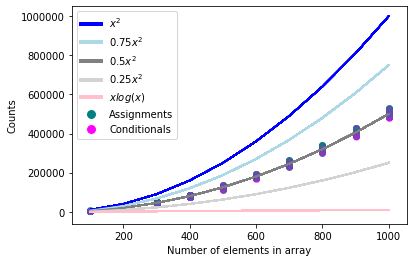

In [34]:
plots(assigns_i, conds_i)

## Bubble Sort

In [24]:
out_b=test_alg(sizes, 100, 'bubble')

In [29]:
out_b=np.array(out_b)
conds_b=pd.DataFrame(out_b[:,0,:], index=sizes)
assigns_b=pd.DataFrame(out_b[:,1,:], index=sizes)

Bubble sort grows on the order of $n^2$ as shown in the graph below. The points represent conditional counts in magenta and assignment counts in teal respectively. The solid lines are plotted to show the general form curve for the functions as shown in the legend. 

My bubble sort implementation follows the $0.75x^2$ curve for assignments and the $0.25x^2$ curve for conditionals, which both can be simplified to $O(n^2)$ run time. This makes sense algorithmically because there is are two for loops, one nested in the other, which each iterate through approximately every element in the input array. 

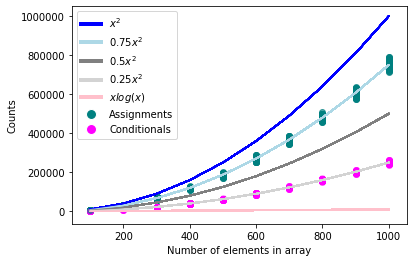

In [35]:
plots(assigns_b, conds_b)

## Quick Sort

In [28]:
out_q=test_alg(sizes, 100, 'quick')

In [31]:
out_q=np.array(out_q)
conds_q=pd.DataFrame(out_q[:,0,:], index=sizes)
assigns_q=pd.DataFrame(out_q[:,1,:], index=sizes)

Quick sort grows on the order of $nlog(n)$ as shown in the graph below. The points represent conditional counts in magenta and assignment counts in teal respectively. The solid lines are plotted to show the general form curve for the functions as shown in the legend. 

My quick sort implementation follows the $nlog(n)$ curve for both assignments and conditionals. This makes sense algorithmically because each run of the partitioning algorithm iterates over all $n$ elements of the input array and on average $log(n)$ partitions will need to happen. 

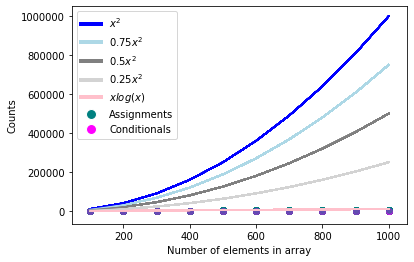

In [36]:
plots(assigns_q, conds_q)